In [1]:
%set_env JUPYTER_CULL_IDLE_TIMEOUT=0
import pandas as pd

env: JUPYTER_CULL_IDLE_TIMEOUT=0


In [2]:
k_data = pd.read_csv("kickstarter_new.csv", index_col = 0)
k_data.head(5)

,id,backers_count,blurb,currency,goal,launched_at,deadline,location.country,name,usd_pledged,...,days_to_deadline,goal_USD,category_name,category_slug,blurb_length,location_type,location_country,location_state,location_displayable_name,binary_state
0,857125548,1,Exploring paint and its place in a digital world.,USD,2000.0,2015-03-19 22:34:57,2015-04-30 23:12:00,US,Remix,25.00000,...,42,2000.0000,Digital Art,art,9,Town,US,NY,"New York, NY",failed
1,1038659700,2,Mike Fassio wants a side-by-side photo of me a...,USD,10.0,2014-07-17 01:55:07,2014-07-27 01:55:07,US,Photo of Grant and Hazel eating cake with bare...,6.00000,...,10,10.0000,Digital Art,art,21,Town,US,WA,"Seattle, WA",failed
2,1238331911,0,I need your help to get a nice graphics tablet...,USD,900.0,2014-07-30 16:29:13,2014-08-29 16:29:13,US,Minecraft Digital Art/Animations,0.00000,...,30,900.0000,Digital Art,art,12,Town,US,VA,"Moneta, VA",failed
3,189217262,0,I want to create a Nature Photograph Series of...,USD,900.0,2015-05-11 16:09:11,2015-05-31 16:09:11,US,Sacramento Nature Photograph Series,0.00000,...,20,900.0000,Digital Art,art,17,Town,US,CA,"Sacramento, CA",failed
4,1260075071,1,I want to bring colour to the world in my own ...,GBP,15000.0,2015-02-06 21:52:02,2015-03-08 20:52:02,GB,North Africa art project - my dream,1.52011,...,30,22801.6545,Digital Art,art,26,County,GB,England,"Essex, UK",failed


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
###########      CLEANING        #############
k_data.drop_duplicates(subset = "id", keep="first", inplace=True)
#k_data.info()
#k_data.drop_duplicates(subset = "name", keep="first", inplace=True)
k_data.drop_duplicates(subset = "blurb", keep="first", inplace=True)
k_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313192 entries, 0 to 768
Data columns (total 29 columns):
id                           313192 non-null int64
backers_count                313192 non-null int64
blurb                        313192 non-null object
currency                     313192 non-null object
goal                         313192 non-null float64
launched_at                  313192 non-null object
deadline                     313192 non-null object
location.country             312113 non-null object
name                         313192 non-null object
usd_pledged                  313192 non-null float64
slug                         313192 non-null object
spotlight                    313192 non-null bool
staff_pick                   313192 non-null bool
static_usd_rate              313192 non-null float64
state                        313192 non-null object
year                         313192 non-null int64
month                        313192 non-null int64
day          

#Check for negative goals

In [5]:
neg_goal = np.where(k_data.goal_USD < 0, 0, 1)
neg_goal.sum()

313192

In [6]:
#Check for projects starting in future or too long in the past
fut_year = np.where(k_data.year > 2019, 0, 1)
past_year = np.where(k_data.year < 2000, 0, 1)
fut_year.sum() + past_year.sum()

626384

In [7]:
#Check if month in range
more_month = np.where(k_data.month > 12, 0, 1)
less_month = np.where(k_data.month < 1, 0, 1)
more_month.sum() + less_month.sum()

626384

In [8]:
#Check if day in range
more_day = np.where(k_data.day > 31, 0, 1)
less_day = np.where(k_data.day < 1, 0, 1)
more_day.sum() + less_day.sum()

626384

In [9]:
#Check if duration negative or too long
more_days_to_deadline = np.where(k_data.days_to_deadline > 365, 0, 1)
less_days_to_deadline = np.where(k_data.days_to_deadline < 0, 0, 1)
more_days_to_deadline.sum() + less_days_to_deadline.sum()

626384

In [10]:
#Check for missing values
print(k_data.isnull().sum())
k_data.drop("location.country", axis=1, inplace=True)
k_data.isnull().sum()

id                              0
backers_count                   0
blurb                           0
currency                        0
goal                            0
launched_at                     0
deadline                        0
location.country             1079
name                            0
usd_pledged                     0
slug                            0
spotlight                       0
staff_pick                      0
static_usd_rate                 0
state                           0
year                            0
month                           0
day                             0
hour                            0
days_to_deadline                0
goal_USD                        0
category_name                   0
category_slug                   0
blurb_length                    0
location_type                   0
location_country                0
location_state                  0
location_displayable_name       0
binary_state                    0
dtype: int64


id                           0
backers_count                0
blurb                        0
currency                     0
goal                         0
launched_at                  0
deadline                     0
name                         0
usd_pledged                  0
slug                         0
spotlight                    0
staff_pick                   0
static_usd_rate              0
state                        0
year                         0
month                        0
day                          0
hour                         0
days_to_deadline             0
goal_USD                     0
category_name                0
category_slug                0
blurb_length                 0
location_type                0
location_country             0
location_state               0
location_displayable_name    0
binary_state                 0
dtype: int64

In [11]:
#Eliminated irrelevant features
#k_data.drop("id", axis=1, inplace=True)
k_data.drop("goal", axis=1, inplace=True)
k_data.drop("blurb", axis=1, inplace=True)
k_data.drop("deadline", axis=1, inplace=True)
k_data.drop("state", axis=1, inplace=True)
k_data.drop("slug", axis=1, inplace=True)
k_data.drop("launched_at", axis=1, inplace=True)
k_data.drop("spotlight", axis=1, inplace=True)
k_data.drop("static_usd_rate", axis=1, inplace=True)
k_data.drop("location_displayable_name", axis=1, inplace=True)
k_data.head(2)

,id,backers_count,currency,name,usd_pledged,staff_pick,year,month,day,hour,days_to_deadline,goal_USD,category_name,category_slug,blurb_length,location_type,location_country,location_state,binary_state
0,857125548,1,USD,Remix,25.0,False,2015,3,19,0,42,2000.0,Digital Art,art,9,Town,US,NY,failed
1,1038659700,2,USD,Photo of Grant and Hazel eating cake with bare...,6.0,False,2014,7,17,0,10,10.0,Digital Art,art,21,Town,US,WA,failed


In [12]:
k_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313192 entries, 0 to 768
Data columns (total 19 columns):
id                  313192 non-null int64
backers_count       313192 non-null int64
currency            313192 non-null object
name                313192 non-null object
usd_pledged         313192 non-null float64
staff_pick          313192 non-null bool
year                313192 non-null int64
month               313192 non-null int64
day                 313192 non-null int64
hour                313192 non-null int64
days_to_deadline    313192 non-null int64
goal_USD            313192 non-null float64
category_name       313192 non-null object
category_slug       313192 non-null object
blurb_length        313192 non-null int64
location_type       313192 non-null object
location_country    313192 non-null object
location_state      313192 non-null object
binary_state        313192 non-null object
dtypes: bool(1), float64(2), int64(8), object(8)
memory usage: 45.7+ MB


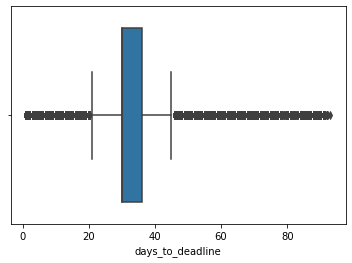

In [13]:
#Check for outliers
sns.boxplot(x=k_data['days_to_deadline'])

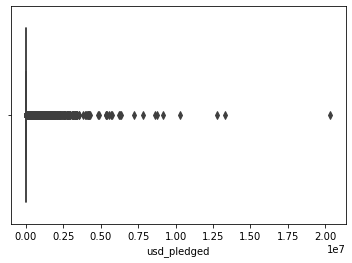

In [14]:
sns.boxplot(x=k_data['usd_pledged'])

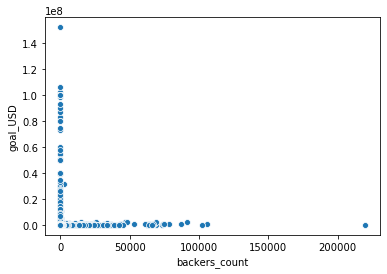

In [15]:
sns.scatterplot(y=k_data['goal_USD'], x=k_data['backers_count'])

#######      TRANSFORMATIONS         #########

In [16]:
#Count words in the name
name = np.array(k_data.name)
named = 0
name_list = [None] *len(name)
nr_word_name = [None] *len(name)
for index in range(len(name)):
    name_list[index] = name[index].split()
for index in range(len(name_list)):
    for word in name_list[index]:
        named += 1
    nr_word_name[index]=named
    named = 0
k_data['name_length'] = nr_word_name
k_data.drop("name", axis=1, inplace=True)

In [17]:
k_data.describe()
k_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313192 entries, 0 to 768
Data columns (total 19 columns):
id                  313192 non-null int64
backers_count       313192 non-null int64
currency            313192 non-null object
usd_pledged         313192 non-null float64
staff_pick          313192 non-null bool
year                313192 non-null int64
month               313192 non-null int64
day                 313192 non-null int64
hour                313192 non-null int64
days_to_deadline    313192 non-null int64
goal_USD            313192 non-null float64
category_name       313192 non-null object
category_slug       313192 non-null object
blurb_length        313192 non-null int64
location_type       313192 non-null object
location_country    313192 non-null object
location_state      313192 non-null object
binary_state        313192 non-null object
name_length         313192 non-null int64
dtypes: bool(1), float64(2), int64(9), object(7)
memory usage: 45.7+ MB


In [18]:
#Rename columns
k_data.rename(columns={'days_to_deadline': 'campaign_duration', 'category_name': 'subcategory',
                       'category_slug': 'category', 'blurb_length': 'description_length'}, inplace=True)
k_data.head(3)

,id,backers_count,currency,usd_pledged,staff_pick,year,month,day,hour,campaign_duration,goal_USD,subcategory,category,description_length,location_type,location_country,location_state,binary_state,name_length
0,857125548,1,USD,25.0,False,2015,3,19,0,42,2000.0,Digital Art,art,9,Town,US,NY,failed,1
1,1038659700,2,USD,6.0,False,2014,7,17,0,10,10.0,Digital Art,art,21,Town,US,WA,failed,10
2,1238331911,0,USD,0.0,False,2014,7,30,0,30,900.0,Digital Art,art,12,Town,US,VA,failed,3


########  DATA EXPLORATION   ########

In [19]:
k_data.describe()

,id,backers_count,usd_pledged,year,month,day,hour,campaign_duration,goal_USD,description_length,name_length
count,3.131920e+05,313192.000000,3.131920e+05,313192.000000,313192.000000,313192.000000,313192.0,313192.000000,3.131920e+05,313192.000000,313192.000000
mean,1.074186e+09,128.309123,1.092841e+04,2015.057786,6.294810,15.208090,0.0,33.736242,3.935532e+04,19.032201,5.756226
std,6.193455e+08,972.342455,9.792958e+04,2.262361,3.358188,8.843429,0.0,12.389012,1.021775e+06,5.050245,2.749569
min,8.624000e+03,0.000000,0.000000e+00,2009.000000,1.000000,1.000000,0.0,1.000000,1.000000e-02,1.000000,1.000000
25%,5.367038e+08,2.000000,5.000000e+01,2014.000000,3.000000,8.000000,0.0,30.000000,1.977000e+03,16.000000,4.000000
50%,1.076023e+09,17.000000,9.271233e+02,2015.000000,6.000000,15.000000,0.0,30.000000,5.000000e+03,20.000000,6.000000
75%,1.609298e+09,70.000000,5.104000e+03,2017.000000,9.000000,23.000000,0.0,36.000000,1.500000e+04,23.000000,8.000000
max,2.147476e+09,219382.000000,2.033899e+07,2019.000000,12.000000,31.000000,0.0,93.000000,1.523501e+08,41.000000,29.000000


In [20]:
k_data.drop('hour', axis=1, inplace=True)

In [21]:
k_data.describe()

,id,backers_count,usd_pledged,year,month,day,campaign_duration,goal_USD,description_length,name_length
count,3.131920e+05,313192.000000,3.131920e+05,313192.000000,313192.000000,313192.000000,313192.000000,3.131920e+05,313192.000000,313192.000000
mean,1.074186e+09,128.309123,1.092841e+04,2015.057786,6.294810,15.208090,33.736242,3.935532e+04,19.032201,5.756226
std,6.193455e+08,972.342455,9.792958e+04,2.262361,3.358188,8.843429,12.389012,1.021775e+06,5.050245,2.749569
min,8.624000e+03,0.000000,0.000000e+00,2009.000000,1.000000,1.000000,1.000000,1.000000e-02,1.000000,1.000000
25%,5.367038e+08,2.000000,5.000000e+01,2014.000000,3.000000,8.000000,30.000000,1.977000e+03,16.000000,4.000000
50%,1.076023e+09,17.000000,9.271233e+02,2015.000000,6.000000,15.000000,30.000000,5.000000e+03,20.000000,6.000000
75%,1.609298e+09,70.000000,5.104000e+03,2017.000000,9.000000,23.000000,36.000000,1.500000e+04,23.000000,8.000000
max,2.147476e+09,219382.000000,2.033899e+07,2019.000000,12.000000,31.000000,93.000000,1.523501e+08,41.000000,29.000000


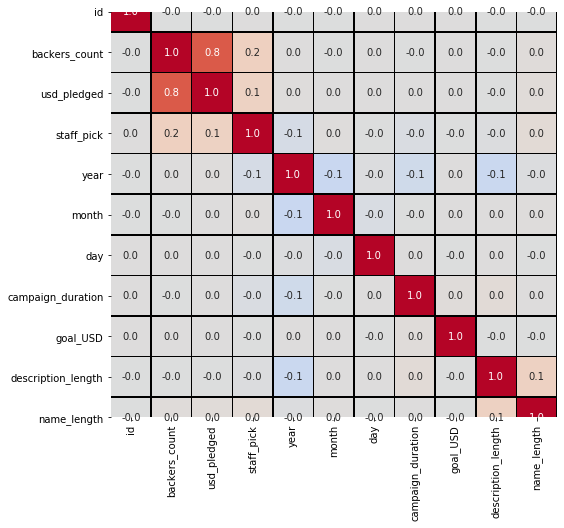

In [22]:
k_data_correlation = k_data.corr()
plt.figure(figsize=(8,8))
g = sns.heatmap(k_data_correlation, cmap='coolwarm', annot = True, fmt='.1f', center =0, vmin = -1, vmax = 1,
               linewidths=.5, linecolor='black', square = True, cbar=False)
plt.show()

In [23]:
k_data.drop('usd_pledged', axis=1, inplace = True)

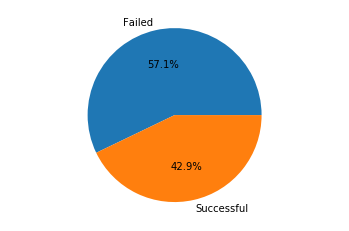

In [24]:
status = np.array(k_data['binary_state'])
for replacer in range(len(status)):
    if status[replacer] == 'failed':
        status[replacer] = 0
    else:
        status[replacer] = 1
words_appearances = dict()
for word in status:
    if word in words_appearances:
       words_appearances[word] += 1
    else:
        words_appearances[word] = 1
plt.axis('equal')
plt.pie(words_appearances.values(), labels=['Failed', 'Successful'], autopct = '%0.1f%%')
plt.show()

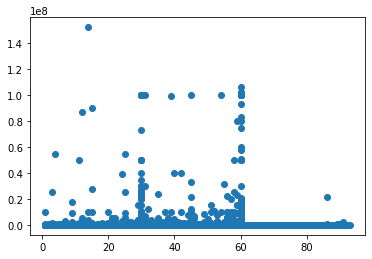

In [25]:
plt.scatter(k_data["campaign_duration"], k_data["goal_USD"])
plt.xlabel="Duration"
plt.ylabel="Goal"
plt.show()

In [26]:
k_data.category.unique()

array(['art', 'comics', 'crafts', 'design', 'dance', 'fashion',
       'film & video', 'food', 'games', 'music', 'journalism',
       'publishing', 'photography', 'technology', 'theater'], dtype=object)

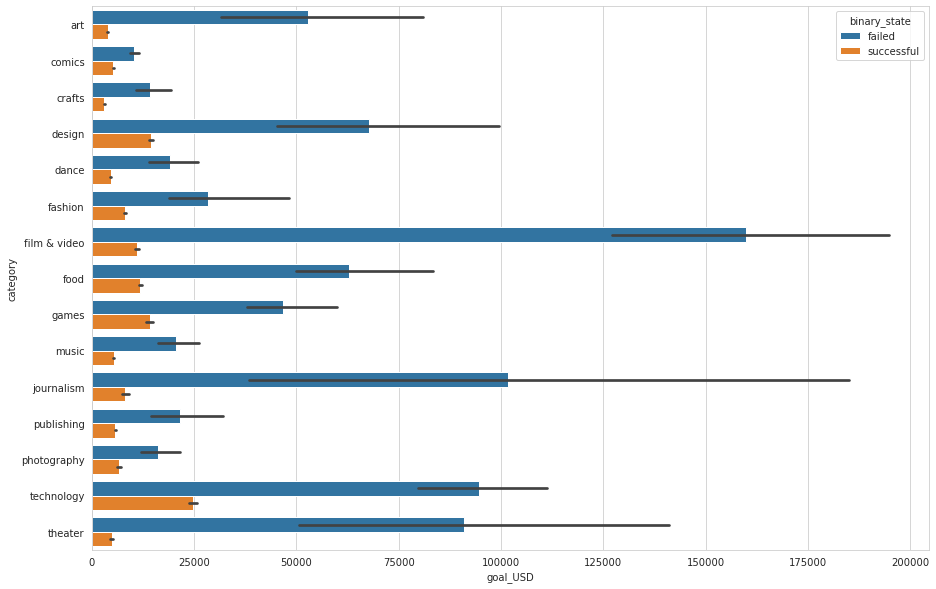

In [27]:
plt.figure(figsize=(15,10))
plt.xlabel="Goal"
plt.ylabel="Category"
sns.set_style("whitegrid", None)
sns.barplot(x="goal_USD", y="category", data=k_data, hue="binary_state")

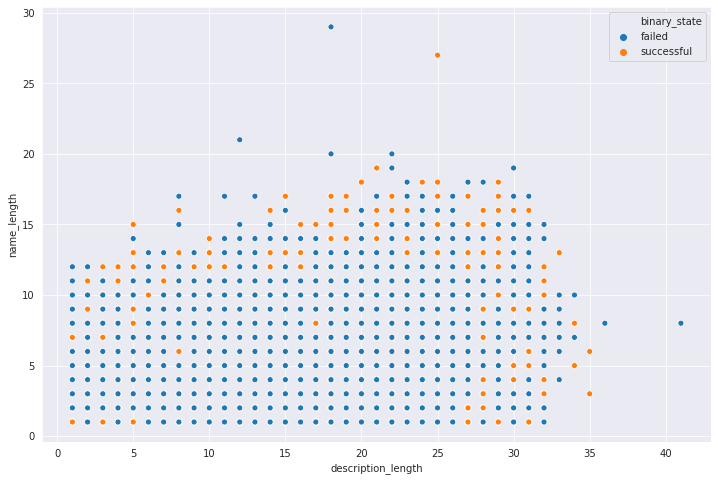

In [28]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid", None)
sns.scatterplot( x="description_length", y="name_length", data=k_data, hue="binary_state")

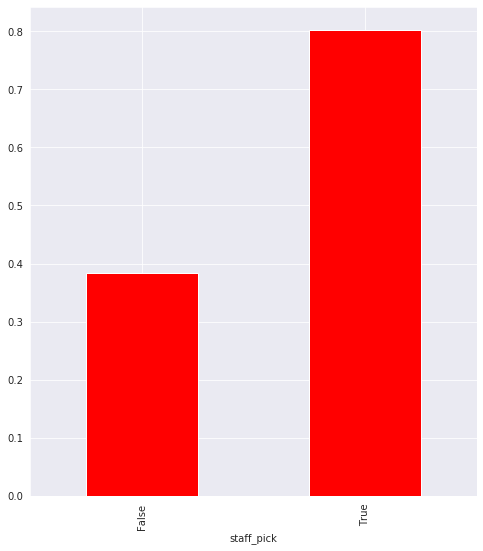

In [29]:
bystaffpick = k_data.groupby(by=['staff_pick', 'binary_state']).count()
bystaffpick = bystaffpick['id'].unstack('binary_state').fillna(0)
bystaffpick['success_rate'] = bystaffpick['successful'] / (bystaffpick['successful'] + bystaffpick['failed'])
plt.figure(figsize=(8,9))
plt.ylabel="Success rate"
bystaffpick['success_rate'].plot(kind='bar', color="red")
plt.show()

In [30]:
# Transform binary_state into categorical variable
successful = pd.get_dummies(k_data.binary_state, drop_first=True)
successful.tail(5)

,successful
2053,0
2576,0
2848,0
541,0
768,1


In [31]:
k_data.currency.describe()

count     313192
unique        14
top          USD
freq      233062
Name: currency, dtype: object

In [32]:
k_data.subcategory.unique()

array(['Digital Art', 'Illustration', 'Public Art', 'Ceramics',
       'Conceptual Art', 'Sculpture', 'Mixed Media', 'Performance Art',
       'Installations', 'Textiles', 'Video Art', 'Anthologies',
       'Comic Books', 'Candles', 'Crochet', 'DIY', 'Embroidery', 'Glass',
       'Knitting', 'Letterpress', 'Pottery', 'Printing', 'Quilts',
       'Stationery', 'Graphic Design', 'Painting', 'Events',
       'Graphic Novels', 'Webcomics', 'Interactive Design',
       'Product Design', 'Taxidermy', 'Weaving', 'Woodworking',
       'Performances', 'Residencies', 'Spaces', 'Workshops',
       'Architecture', 'Civic Design', 'Accessories', 'Apparel',
       'Typography', 'Footwear', 'Jewelry', 'Pet Fashion',
       'Ready-to-wear', 'Action', 'Drama', 'Childrenswear', 'Couture',
       'Experimental', 'Family', 'Fantasy', 'Horror', 'Animation',
       'Documentary', 'Movie Theaters', 'Music Videos', 'Narrative Film',
       'Festivals', 'Science Fiction', 'Comedy', 'Shorts', 'Television',
    

In [33]:
k_data = pd.concat([k_data, successful], axis=1)
k_data.drop('binary_state', axis =1, inplace = True)
k_data.tail(5)

,id,backers_count,currency,staff_pick,year,month,day,campaign_duration,goal_USD,subcategory,category,description_length,location_type,location_country,location_state,name_length,successful
2053,1267683321,45,GBP,True,2018,6,6,30,26623.359400,Design,design,20,Town,GB,England,7,0
2576,1975312856,1,GBP,False,2018,6,9,30,4695.465530,Comics,comics,17,Town,GB,England,6,0
2848,1223758283,7,EUR,False,2018,5,29,30,556.518237,Design,design,14,Town,IT,Lazio,7,0
541,1535298356,7,USD,False,2018,6,4,30,1500.000000,Comic Books,comics,21,Town,US,MI,6,0
768,320459788,62,USD,False,2018,5,21,10,550.000000,Graphic Design,design,8,Town,US,IL,6,1


In [34]:
staff_picked = pd.get_dummies(k_data.staff_pick, drop_first=True)
currency = pd.get_dummies(k_data.currency)
category = pd.get_dummies(k_data.category)
subcategory = pd.get_dummies(k_data.subcategory)
loc_type = pd.get_dummies(k_data.location_type)
country = pd.get_dummies(k_data.location_country)
k_data = pd.concat([k_data, staff_picked, currency, category, subcategory, loc_type], axis=1)
k_data.drop("id", axis=1, inplace=True)
k_data.drop("backers_count", axis=1, inplace=True)
k_data.drop("currency", axis=1, inplace=True)
k_data.drop("staff_pick", axis=1, inplace=True)
k_data.drop("subcategory", axis=1, inplace=True)
k_data.drop("category", axis=1, inplace=True)
k_data.drop("location_country", axis=1, inplace=True)
k_data.drop("location_state", axis=1, inplace=True)
k_data.drop("location_type", axis=1, inplace=True)

In [35]:
# Separating the features
Y = k_data.successful
k_data.drop("successful", axis=1, inplace = True)
X = k_data

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313192 entries, 0 to 768
Columns: 205 entries, year to Zip
dtypes: float64(1), int64(6), uint8(198)
memory usage: 88.3 MB


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression()

In [41]:
logmodel.fit(X_train, Y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
prediction = logmodel.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
classification_report(Y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.61      0.90      0.72     53630\n           1       0.63      0.22      0.32     40328\n\n    accuracy                           0.61     93958\n   macro avg       0.62      0.56      0.52     93958\nweighted avg       0.62      0.61      0.55     93958\n'

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matri = confusion_matrix(Y_test, prediction)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(Y_test, prediction)

0.6090912961110283

In [49]:
TP = confusion_matri[1, 1]
TN = confusion_matri[0, 0]
FP = confusion_matri[0, 1]
FN = confusion_matri[1, 0]

In [50]:
#Sensitivity
TP / float(FN + TP)

0.21895457250545527

In [51]:
#Specificity
TN / (TN + FP)

0.9024613089688607

In [52]:
from sklearn import svm, tree
model3 = tree.DecisionTreeClassifier()

In [53]:
model3.fit(X_train, Y_train)
y_predt = model3.predict(X_test)

In [54]:
accuracy_score(Y_test, y_predt)

0.705240639434641

In [55]:
confusion_matr = confusion_matrix(Y_test, y_predt)
confusion_matr

array([[39700, 13930],
       [13765, 26563]])

In [56]:
TP = confusion_matr[1, 1]
TN = confusion_matr[0, 0]
FP = confusion_matr[0, 1]
FN = confusion_matr[1, 0]

In [57]:
#Sensitivity
TP / float(FN + TP)

0.6586738742313033

In [58]:
#Specificity
TN / (TN + FP)

0.7402573186649264

In [59]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()

In [60]:
model4.fit(X_train, Y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
y_predt = model4.predict(X_test)

In [62]:
accuracy_score(Y_test, y_predt)

0.7573277421826774

In [63]:
confusion_mat = confusion_matrix(Y_test, y_predt)
confusion_mat

array([[46351,  7279],
       [15522, 24806]])

In [64]:
TP = confusion_mat[1, 1]
TN = confusion_mat[0, 0]
FP = confusion_mat[0, 1]
FN = confusion_mat[1, 0]

In [65]:
#Sensitivity
TP / float(FN + TP)

0.6151061297361634

In [66]:
#Specificity
TN / (TN + FP)

0.8642737273913854

In [ ]:
from sklearn import naive_bayes
model6 = naive_bayes.BernoulliNB()
model6.fit(X_train, Y_train)

In [ ]:
y_pred = model6.predict(X_test)

In [ ]:
accuracy_score(Y_test, y_pred)

In [ ]:
confusion_ma = confusion_matrix(Y_test, y_pred)
confusion_ma

In [ ]:
TP = confusion_ma[1, 1]
TN = confusion_ma[0, 0]
FP = confusion_ma[0, 1]
FN = confusion_ma[1, 0]

In [ ]:
#Sensitivity
TP / float(FN + TP)

In [ ]:
#Specificity
TN / (TN + FP)